In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Flatten
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.utils import to_categorical

In [ ]:
#Cargamos los datos de train y test
(trainX, trainY), (testX, testY) = mnist.load_data()

In [ ]:
#para mostrar los datos
print("TrainX:", trainX.shape)
print("TrainY:", trainY.shape)
print("TestX:", testX.shape)
print("TestY:", testY.shape)

TrainX: (60000, 28, 28)
TrainY: (60000,)
TestX: (10000, 28, 28)
TestY: (10000,)


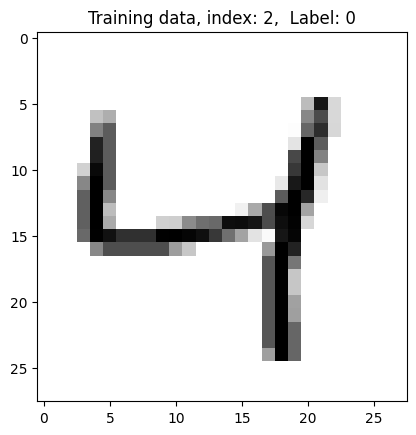

In [ ]:
#Función para visualizar los datos que acabamos de cargar
def display_digit(index):
    label = trainY[index].argmax(axis=0)
    # Reshape 784 array into 28x28 image
    image = trainX[index].reshape([28,28])
    plt.title('Training data, index: %d,  Label: %d' % (index, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()

# Visualizamos el dígito que queramos pasando una posicióndel array
display_digit(2)

In [ ]:
dimension_input = trainX.shape[1] * trainX.shape[2]

trainX_norm = trainX / 255
testX_norm = testX / 255

trainY_cate = to_categorical(trainY)
testY_cate = to_categorical(testY)

In [ ]:
# Nuestro modelo
def build_model():
    # Con esta linea se resetean todos los parametros y variables
    #@tf.campat.v1.reset_default_graph()

    #### Your code ####
    model = Sequential()
    model.add(Input(shape=(dimension_input,)))
    model.add(Dense(dimension_input, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
model_tofit = build_model()

model_tofit.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 666,330 (2.54 MB)

 Trainable params: 666,330 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
trainX_norm = trainX_norm.reshape(trainX_norm.shape[0], dimension_input)
testX_norm = testX_norm.reshape(testX_norm.shape[0], dimension_input)
model_tofit.fit(trainX_norm, trainY_cate, validation_data = (testX_norm, testY_cate), epochs = 5, batch_size = 128, verbose = 2)

Epoch 1/5
469/469 - 8s - 17ms/step - accuracy: 0.9318 - loss: 0.2348 - val_accuracy: 0.9654 - val_loss: 0.1097
Epoch 2/5
469/469 - 7s - 14ms/step - accuracy: 0.9742 - loss: 0.0857 - val_accuracy: 0.9727 - val_loss: 0.0828
Epoch 3/5
469/469 - 8s - 17ms/step - accuracy: 0.9831 - loss: 0.0560 - val_accuracy: 0.9783 - val_loss: 0.0708
Epoch 4/5
469/469 - 6s - 13ms/step - accuracy: 0.9881 - loss: 0.0368 - val_accuracy: 0.9774 - val_loss: 0.0706
Epoch 5/5
469/469 - 11s - 23ms/step - accuracy: 0.9914 - loss: 0.0277 - val_accuracy: 0.9770 - val_loss: 0.0788


In [ ]:
# Comparar los resultados obtenidos de la predicción del modelo con las clases reales

# HAY QUE AJUSTAR ESTA LÍNEA
# Con la función argmax lo que hacemos es obtener el índice con mayor valor del array (en este caso de un array [ 0  0.2  0.2 0.1 0.5] obtendriamos un 4)
predictions = np.array(model_tofit.predict(testX_norm)).argmax(axis=1)

# Igual ocurre con las clases reales, lo traducimos de array a valor numérico y sacamos la media de aciertos
actual = testY_cate.argmax(axis=1)
test_accuracy = np.mean(predictions == actual, axis=0)

# Print out the result
print("Test accuracy: ", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test accuracy:  0.977


In [ ]:
confusion_matrix(y_true=predictions, y_pred=testY_cate.argmax(axis=1))

array([[ 974,    0,    6,    0,    4,    3,    6,    0,    7,    4],
       [   0, 1127,    0,    0,    1,    0,    3,    3,    0,    2],
       [   0,    4, 1012,   13,    3,    0,    1,    7,    2,    0],
       [   0,    0,    2,  974,    0,   16,    1,    0,    0,    2],
       [   1,    0,    1,    0,  956,    1,    2,    1,    4,    4],
       [   1,    0,    0,    1,    0,  845,    4,    0,    0,    1],
       [   1,    1,    2,    0,    3,    5,  936,    0,    0,    0],
       [   1,    1,    3,    5,    2,    1,    1, 1004,    4,    3],
       [   2,    2,    5,    5,    1,   11,    4,    3,  950,    1],
       [   0,    0,    1,   12,   12,   10,    0,   10,    7,  992]])

In [ ]:
print(classification_report(np.argmax(testY_cate, axis=1), predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.96      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.95      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.95      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

